In [24]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


# **Dataset**🗃️

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images[0,23,23]

194

In [12]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

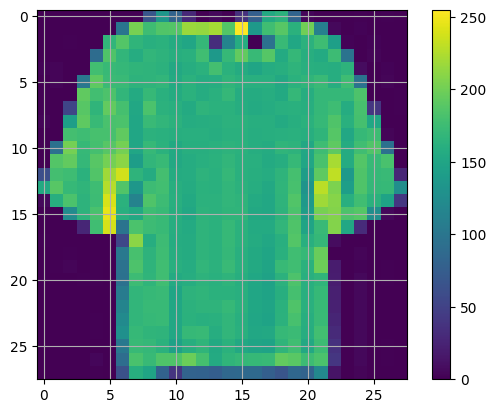

In [12]:
plt.figure()
plt.imshow(train_images[77])
plt.colorbar()
plt.grid(True)
plt.show()

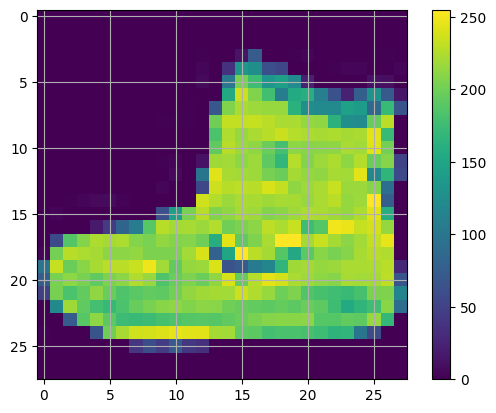

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

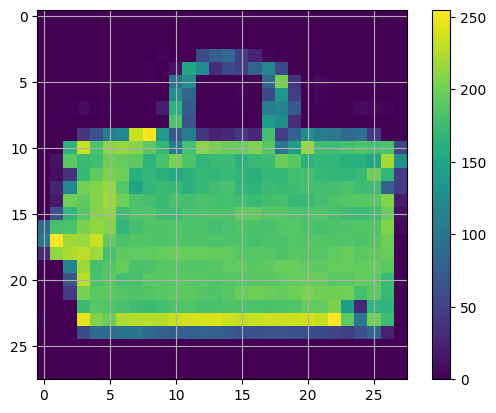

In [26]:
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(True)
plt.show()

# **Preprocesando la Data**

---



*   Se prepara la data para trabajar con valores más pequeños lo que hara más sencillo la creacion del modelo

In [22]:
train_images=train_images /255.0
test_images=test_images /255.0

 # **Creando Modelo**:✏️
### 1. Modelo Secuencial de Keras: Para ordenamiento de capas
### 2. Con 3 capas/layers diferentes
### 3. Representando un modelo *feed forward neural network*
*  :Quiere decir que los datos de entrada se introducen en la red y se propagan a través de la red




In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#Capa de entrada 1
    keras.layers.Dense(128,activation='relu'),#Capa de entrada 2
     keras.layers.Dense(10,activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10   )


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 3.0768 - accuracy: 0.7068
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6583 - accuracy: 0.7732
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5597 - accuracy: 0.8044
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5279 - accuracy: 0.8156
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5066 - accuracy: 0.8233
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4950 - accuracy: 0.8308
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4818 - accuracy: 0.8330
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4672 - accuracy: 0.8399
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4638 - accuracy: 0.8421
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.45

In [15]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5007 - accuracy: 0.8419
Test accuracy: 0.8418999910354614


In [27]:
predictions=model.predict(test_images)
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 3ms/step
9


Verificar Prediccion

Ingresa un numero: 99
1/1 [==============================] - 0s 20ms/step


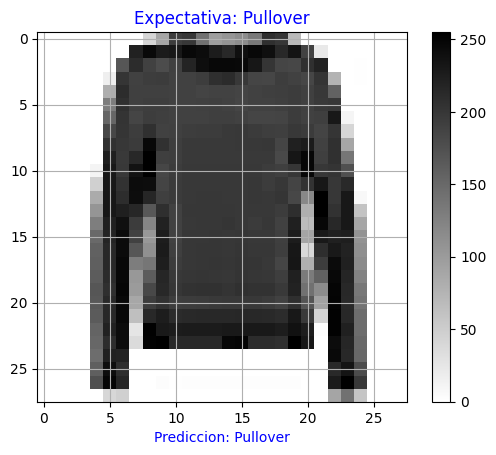

In [36]:
COLOR='blue'
plt.rcParams['text.color']= COLOR
plt.rcParams['axes.labelcolor']=COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expectativa: " + label)
  plt.xlabel("Prediccion: " + guess)
  plt.colorbar()
  plt.grid(True)
  plt.show()

def get_number():
  while True:
    num = input("Ingresa un numero: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("ingresa otro numero")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)